In [1]:
import matplotlib.pylab as plt
import numpy as np 
import arby
from scipy.integrate import odeint

In [2]:
def pend(y, t, b, λ):
    θ, ω = y
    dydt = [ω, -b*ω - λ*np.sin(θ)]

    return dydt

In [28]:
# set friction strength
b = 0.2
# set initial conditions
y0 = [np.pi/2e7, 0.]

In [39]:
# set a time discretization
times = np.linspace(0,50,1001)

In [40]:
# plot a simple solution
λ = 1.
sol = odeint(pend,y0, times, (b,λ))

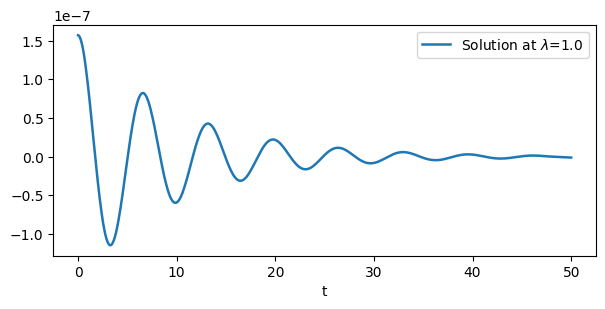

In [41]:
plt.figure(figsize=(7,3))
plt.plot(times, sol[:,0], label=f'Solution at $\lambda$={λ}', lw=1.8)
plt.xlabel('t')
plt.legend()

In [42]:
from arby import ReducedOrderModel as ROM


In [43]:
param = np.linspace(1,5,101)

In [44]:
%%time
training = []
for λ in param:
    sol = odeint(pend,y0, times, (b,λ))
    training.append(sol[:,0])

CPU times: user 122 ms, sys: 4.59 ms, total: 126 ms
Wall time: 123 ms


In [49]:
pendulum = ROM(training, times, param, greedy_tol=1e-20, poly_deg=5)

In [50]:
pendulum.surrogate(1.14)

array([ 1.57079633e-07,  1.56857390e-07,  1.56192866e-07, ...,
       -4.34232662e-10, -3.96822281e-10, -3.58789412e-10])

In [51]:
surr = pendulum.surrogate

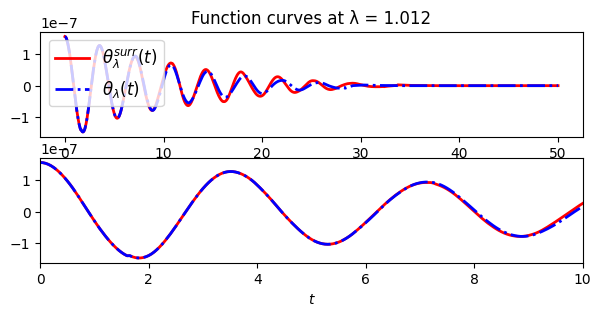

In [52]:
par = 3.42
sol = odeint(pend,y0, times, (b,par))[:,0]
fig, ax = plt.subplots(2,1, figsize=(7,3))
ax[0].plot(times, surr(par), 'r', lw=2, label='$θ_λ^{surr}(t)$')
ax[0].plot(times, sol, 'b-.', lw=2, label='$θ_λ(t)$')
ax[1].plot(times, surr(par), 'r', lw=2, label='$θ_λ^{surr}(t)$')
ax[1].plot(times, sol, 'b-.', lw=2, label='$θ_λ(t)$')
ax[1].set(xlim=(0,10))
ax[1].set(xlabel='$t$')
ax[0].set_title('Function curves at λ = 1.012')
ax[0].legend(fontsize = 'large')

In [53]:
pendulum.basis_.eim_.nodes[:5]

[0, 994, 210, 121, 504]

In [54]:
np.shape(pendulum.basis_.eim_.interpolant)

(1001, 101)

In [55]:
pwd

'/home/agustin/facultad/scikit_rm/scikit-reducedmodel'

In [56]:
from skreducedmodel.reducedbasis import ReducedBasis

In [78]:
model = ReducedBasis(
                     index_seed_global_rb = 0,
                     greedy_tol = 1e-20,
                     lmax = 0, 
                     normalize = True
                     )

In [79]:
rb = model.fit(
               training_set = np.array(training), 
               parameters = param, 
               physical_points = times,
               )

In [80]:
model.tree.basis.shape

(101, 1001)

In [81]:
len(training)

101

In [82]:
param.shape

(101,)

In [83]:
model.tree.basis[0]

array([ 0.61159098,  0.61083184,  0.60856171, ..., -0.00370307,
       -0.00383629, -0.00396999])

In [84]:
for i in range(model.tree.basis.shape[0]):
    print(np.abs(model.tree.basis[i]))

[0.61159098 0.61083184 0.60856171 ... 0.00370307 0.00383629 0.00396999]
[0.30739375 0.30555755 0.30008214 ... 0.19624939 0.17480993 0.15129475]
[0.47151073 0.46972209 0.46438122 ... 0.00909289 0.00813122 0.00707591]
[0.29592998 0.2941422  0.28881103 ... 0.29503149 0.28816089 0.27771325]
[0.40613262 0.40511511 0.40207409 ... 0.00197265 0.00205193 0.00211667]
[0.20476124 0.20374481 0.2007113  ... 0.02065335 0.02303119 0.02510682]
[0.21437265 0.21289487 0.20849023 ... 0.00398137 0.01303946 0.02187217]
[0.14272156 0.14192656 0.13955468 ... 0.10358231 0.10734884 0.10974748]
[0.11420135 0.11385408 0.11281635 ... 0.00282415 0.00222855 0.00160594]
[0.11917707 0.11902725 0.11857832 ... 0.00255244 0.00232978 0.00213455]
[0.04519868 0.04485818 0.04384373 ... 0.07277964 0.03368928 0.0068091 ]
[0.0198454  0.01977803 0.01957654 ... 0.04760188 0.04463641 0.04096061]
[0.0643734  0.06436747 0.06434947 ... 0.00032774 0.00149063 0.00266812]
[0.0247033  0.02429466 0.02307619 ... 0.00879972 0.00520678 0.00

In [64]:
data1 = np.array(model.tree.basis[0])
print(data1)


[ 0.61159098  0.61083184  0.60856171 ... -0.00370307 -0.00383629
 -0.00396999]


In [34]:
print(model.transform(data1,param))

[6.23990546e-01 6.23495636e-01 6.22017490e-01 ... 2.75798200e-04
 4.71997586e-04 6.65070886e-04]


In [36]:
assert data1.all() == model.transform(data1,param).all()

In [32]:
np.shape(model.transform(data1,param))

(1001,)

In [21]:
from skreducedmodel.skeim import EIM

In [22]:
a = EIM(reduced_base = model)

In [23]:
a.fit

In [24]:
a.nodes

[0,
 70,
 95,
 144,
 232,
 167,
 316,
 253,
 409,
 475,
 425,
 336,
 568,
 627,
 695,
 747,
 494,
 840,
 902,
 816,
 920,
 980,
 765,
 1000,
 550,
 966,
 945,
 397,
 417,
 450,
 467,
 485,
 678,
 457,
 557,
 540,
 577,
 533,
 612,
 596,
 662]

In [25]:
a.nodes[1]

70

In [26]:
stop

NameError: name 'stop' is not defined

In [ ]:
model.integration

In [ ]:
rb = model.fit(
               training_set = np.array(training), 
               parameters = param, 
               physical_points = times,
               )

len(rb.indices),rb.indices,

plt.figure(figsize=(5,3))
plt.yscale("log")
plt.plot(rb.errors,"o")

In [ ]:
rb.indices[9]

In [ ]:
from scipy.integrate import odeint

def pend(y, t, b, λ):
    θ, ω = y
    dydt = [ω, -b*ω - λ*np.sin(θ)]

    return dydt

def test_ReducedModelFit():
    
    b = 0.2
    y0 = [np.pi/2, 0.]
    
    param = np.linspace(1,5,101)
    times = np.linspace(0,50,1001)
     
    training = []
    for λ in param:
        sol = odeint(pend,y0, times, (b,λ))
        training.append(sol[:,0])
    
    training_set = np.array(training) 
    parameters = param
    physical_points = times
    nmax = 10
        
    model = ReducedModel(
                     seed_global_rb = 0,
                     greedy_tol = 1e-16,
                     lmax = 1, 
                     nmax = nmax,
                     normalize = True
                     )
    
    rb = model.fit(
               training_set = training_set, 
               parameters = parameters, 
               physical_points = physical_points,
               )
    
    print(rb.errors[nmax-1],rb.errors[0])
    
    assert rb.errors[0]>rb.errors[nmax-1]
    assert rb.errors[5]>rb.errors[nmax-1]
    assert len(rb.indices) == nmax

In [ ]:
test_ReducedModelFit()

In [ ]:
len(rb.indices)

In [ ]:
rb.indices

In [ ]:
arby_model = arby.reduced_basis(np.array(training), times, greedy_tol=1e-16, normalize=True)

In [ ]:
arby_model.errors[0] == rb.errors[0]

In [ ]:
arby_model.indices